<a href="https://colab.research.google.com/github/HagarIbrahiem/Learning_purposes/blob/main/DL1_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Example1 - Shallow Model

## Data

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist

In [3]:
## The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [4]:
## input as images
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)


In [5]:
## outputs/labels are simply an array of digits, ranging from 0 to 9
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
train_labels[5]

2

In [7]:
## will not used , just for clarification
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels , test_size=0.2,shuffle=True)

In [8]:
print(x_train.shape)
print(x_val.shape)

(48000, 28, 28)
(12000, 28, 28)


In [9]:
print(y_train.shape)
print(y_val.shape)

(48000,)
(12000,)


In [10]:
## (Reshaping to 1D) + (Normalization)
## Before training, we will preprocess our data by reshaping it into the shape that the network expects as we deal with dense/FulluConnected Layerwhich expect 1D input

train_images=train_images.reshape(60000,28*28)
test_images=test_images.reshape(10000,28*28)

## scaling data so that all values are in the [0, 1] interval to avoide saturation at the activae fun
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

##Previously, our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval.
## now We transform it into a float32 array of shape (60000, 28 * 28) with values in the [0 , 1].

In [11]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


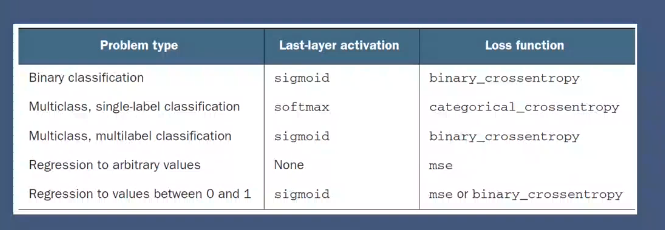

According to the table , out task is MultiClass-SingleLabel, we'll use (( Softmax+Ctegorical_crossEntropy ))

Softmax output will be like:

 y1^hat = [0.1, 0.5, 0.0, 0.1, 0.1, 0.0, 0.0, 0.2, 0.0, 0.0]

crossentroy needs y^hat and y_true , y^hat is an array of 10 values , while y_true is only one integer number , so we need to convert y_true from 1 value to array of 10 values.

if y_true = 2 , then it will be converted to [0,0,1,0,0,0,0,0,0,0]

one_hot enconding in Keras done by using ((to_categorical))

In [12]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


In [13]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical (train_labels)
test_labels = to_categorical (test_labels)

In [14]:
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


## Model

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [16]:
network = models.Sequential()
## simplest form of a NN model is single layer 
# 10 = output of model , which much be as number as classes ,  exceptin acse of binary classification = 1
network.add( layers.Dense( 10  , activation = 'softmax' , input_shape=(28*28,) )) 

In [17]:
network.summary()

## None = No. of Samples used to train the models , w msh htfr2 at each time we run the model 
## params = weights == 7850 ==  ( 784 feature per each img , each is muliplied by weights which is 784 weighst per each neuron * 10 neuons , 34an 3andy 10 output for eachimg + 10 Bias for each neuron)
## Trainable params which the optimizer may change in order to minimize loss


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


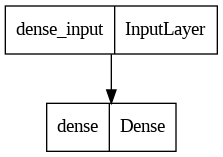

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(network)

##Compilation (loss + optimizer)

In [19]:
network.compile (optimizer='rmsprop', loss= 'categorical_crossentropy' , metrics=['accuracy'])

In [20]:
network.fit( train_images , train_labels , epochs=5 , batch_size =128 )   # x, y , 
#batch_size must be (2 ^ something ), in order to fit as the GPU and avoid fregmentation , cant be 127 , this is the no of samples to be moved from cpu to GPU , 
# kol m azod kol mykon better , 1024 , or even 60000 , but the limiting factor is the GPU memory , if batch_size=2 , will generate the same result bs in slower way, we dont know memoery of gpu of colap
#batchsize not affect result but performance
# for each epoch of 5 , we do the full process including ( forward , loss , backword )
# 60000 / 128 , so each epoch contains 469 steps , one batch contains 469 steps
# results contains training ( loss, accurcy)

Epoch 1/5
 74/469 [===>..........................] - ETA: 1s - loss: 1.3507 - accuracy: 0.6774

KeyboardInterrupt: ignored

In [ ]:
test_loss , test_accuracy = network.evaluate( test_images , test_labels ) 

## we can see that train error is near by test error , so we dont have overfitting

In [ ]:
import matplotlib.pyplot as plt
img = test_images[5]
plt.imshow( np.reshape(img, (28,28) ) )


In [ ]:
print( img.shape)


In [ ]:
print(test_labels[5])

In [ ]:
## use model to predict label of an input img
network.predict( img.reshape(1,-1))
# network.predict( img)
# network.predict( img.reshape( 1,784))

In [ ]:
# use argmax to choose maximum prob and mapp labels to the real values 
np.argmax(network.predict( img.reshape(1,-1)))

# Example2 - Deep  Model

In [22]:
network2 = models.Sequential()
# network.add( layers.Dense( 10  , activation = 'softmax' , input_shape=(28*28,) )) 
network2.add( layers.Dense( 512  , activation = 'relu' , input_shape=(28*28,) ))    ## output of this lyaer is 512 hidden unit (optional), act as a feature extraction part , (784 input pixel + 1 bias )*512=401920
network2.add( layers.Dense( 10  , activation = 'softmax' )) 



In [23]:
network2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


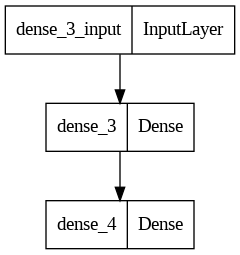

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(network2) 
## input layer -> hidden layer -> output layer

In [28]:
network2.compile (optimizer='rmsprop', loss= 'categorical_crossentropy' , metrics=['accuracy'])

In [29]:
network2.fit( train_images , train_labels , epochs=5 , batch_size =128 )


Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2655 - accuracy: 0.9248
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1090 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0516 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9882


In [30]:
test_loss , test_accuracy = network2.evaluate( test_images , test_labels ) 

313/313 [==============================] - 1s 2ms/step - loss: 0.0678 - accuracy: 0.9791


**Can see how much improvment at the accuracy**

# Example3 - Add More Layers to Deep Model

In [33]:
network3 = models.Sequential()
network3.add( layers.Dense( 512  , activation = 'relu' , name = 'Layer_1' ,input_shape=(28*28, ) ))  
network3.add( layers.Dense( 512  , activation = 'relu' , name = 'Layer_2' ))
network3.add( layers.Dense( 256  , activation = 'relu' , name = 'Layer_3' ))
network3.add( layers.Dense( 50  , activation = 'relu' , name = 'Layer_4' ))
network3.add( layers.Dense( 10  , activation = 'softmax' )) 

network3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               401920    
                                                                 
 Layer_2 (Dense)             (None, 512)               262656    
                                                                 
 Layer_3 (Dense)             (None, 256)               131328    
                                                                 
 Layer_4 (Dense)             (None, 50)                12850     
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 809,264
Trainable params: 809,264
Non-trainable params: 0
_________________________________________________________________


In [34]:
network2.compile (optimizer='rmsprop', loss= 'categorical_crossentropy' , metrics=['accuracy'])

In [35]:
network2.fit( train_images , train_labels , epochs=5 , batch_size =128 )


Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0301 - accuracy: 0.9907
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0223 - accuracy: 0.9937
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0166 - accuracy: 0.9954
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0121 - accuracy: 0.9967
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0097 - accuracy: 0.9974


In [36]:
test_loss , test_accuracy = network2.evaluate( test_images , test_labels ) 

313/313 [==============================] - 1s 2ms/step - loss: 0.0651 - accuracy: 0.9817


**No so Much Improvments !!!**

Adding more layers dosnt mean enhncing accuracy, on contract it may overfit

#Example4 - MNIST using ML Model